# Interactive Visualization Libraries Part - 3 - Holoviews Library


## Content

- HOLOVIEWS LIBRARY

### IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# !pip install pandas_bokeh
# !pip install pygal
# !pip install altair
# !pip install vega_datasets
# !pip install holoviews
# !pip install plotly

# HOLOVIEWS LIBRARY

HoloViews is an open-source Python library designed to make data analysis and visualization seamless and simple. With HoloViews, you can usually express what you want to do in very few lines of code, letting you focus on what you are trying to explore and convey, not on the process of plotting SOURCE.

image.png

### What is HoloViews?

HoloViews allows you to collect and annotate your data in a way that reveals it naturally, with a minimum of effort needed for you to see your data as it actually is. HoloViews is not a plotting library -- it connects your data to plotting code implemented in other packages, such as matplotlib or Bokeh. HoloViews is also not primarily a mass storage or archival data format like HDF5 -- it is designed to package your data to make it maximally visualizable and viewable interactively.

If you supply just enough additional information to the data of interest, HoloViews allows you to store, index, slice, analyze, reduce, compose, display, and animate your data as naturally as possible. HoloViews makes your numerical data come alive, revealing itself easily and without extensive coding SOURCE.

### Important Information

Holoviews maintains metadata about your plot and it does not do any plotting by itself. It just organizes metadata about how to plot data and uses it's underlying back-end library like bokeh, matplotlib or plotly to actually plot data.

In [3]:
# !pip install holoviews


In [ ]:
import holoviews as hv
from holoviews import dim, opts

hv.extension("bokeh")
hv.extension("plotly")

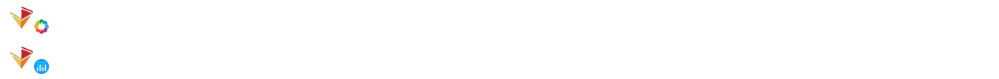

We'll start plotting a few basic plots like scatter plot, bar chart, histogram, etc. We'll then further explore holoviews options.

### Note : Please make a note that if you don't provide any back-end then it selects bokeh by default.

### "wine", a built-in dataset at sklearn library, will be used for the visualization.

In [5]:
from sklearn.datasets import load_wine

wine = load_wine()

print("Feature Names : ", wine.feature_names)
print("\nTarget Names : ", wine.target_names)

wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df["Target"] = wine.target
wine_df["Target"] = ["Class_1" if typ==0 else "Class_2" if typ==1 else "Class_3"  for typ in wine_df["Target"]]

print("\nDataset Size : ", wine_df.shape)

wine_df.head()

Feature Names :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Names :  ['class_0' 'class_1' 'class_2']

Dataset Size :  (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Class_1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Class_1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Class_1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Class_1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Class_1


In [6]:
# !pip install pandas-bokeh  # The Installation of the bokeh library with pip

import pandas_bokeh
from bokeh.io import show # output_notebook  # We need this command to display the charts
from bokeh.plotting import figure  # Bokeh plotting is an interface for creating interactive visuals 
                                   # which we import from the figure  that acts as a container that holds our charts.
pandas_bokeh.output_notebook()  # We need this command to display the output of the charts in the jupyter notebook
# pandas_bokeh.output_file(filename)  # To embed the charts as HTML, run this command
from bokeh.models import HoverTool, ColumnDataSource  # Hovertool is used to display the value when we hover over the data 
                                                      # using a mouse pointer and ColumnDataSource is the Bokeh version of DataFrame

pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

### Let us first remember what Bokeh gives us.

In [7]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
p = penguins.plot_bokeh.scatter(x='body_mass_g',
                                y='flipper_length_mm', category='species',
                                legend = "top_left",
                                title='The Correlation Between Flipper Length & Body Mass')

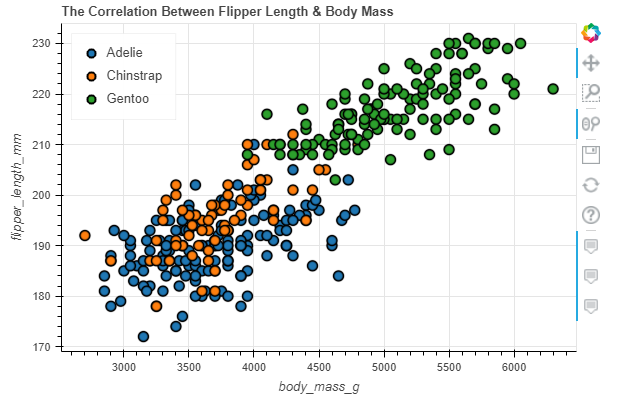

We are plotting the scatter plot below to show the relationship between alcohol and malic_acid values in wine. We can see that just one line of code is enough to create a simple interactive graph. We need to pass the first argument as a dataframe that maintains data and then kdims and vdims to represent x and y of a graph.



In [ ]:
hv.extension("plotly")

scatter = hv.Points(data=wine_df, 
                     kdims=["alcohol", "malic_acid"],
                     vdims="Target", 
                     label="Alcohol vs Malic Acid")

scatter.opts(color='#1BD849', size=10, marker='circle')

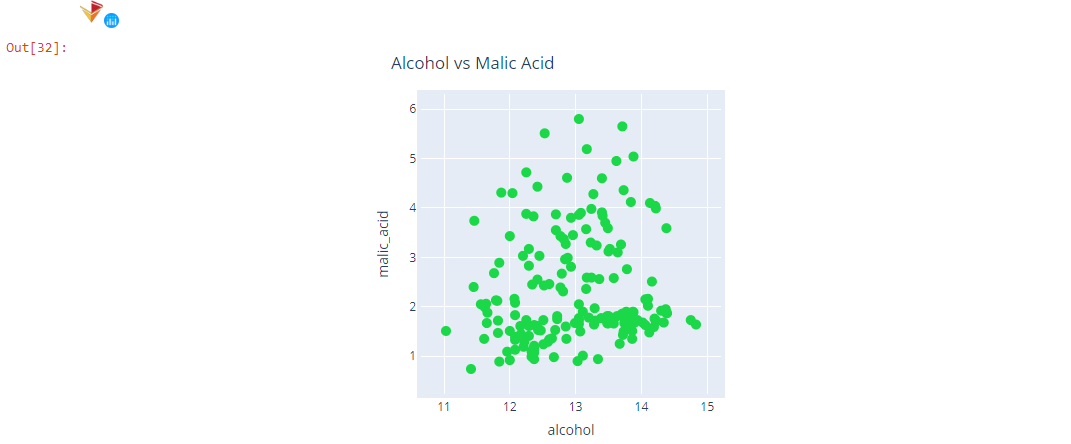

In [10]:
# !pip install dash

In [11]:
df = pd.read_csv('grant_complete.csv')
df.head()

,band,beak depth (mm),beak length (mm),species,year
0,20123,8.05,9.25,fortis,1973
1,20126,10.45,11.35,fortis,1973
2,20128,9.55,10.15,fortis,1973
3,20129,8.75,9.95,fortis,1973
4,20133,10.15,11.55,fortis,1973


### Let us create our first basic chart by playing with fundamental parameters.



In [ ]:
hv.extension("plotly")

df_2012 = df.loc[df['year']==2012, :].copy()

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'], 
          vdims=['species']).opts(color='#D81BBF', size=8, marker='circle')

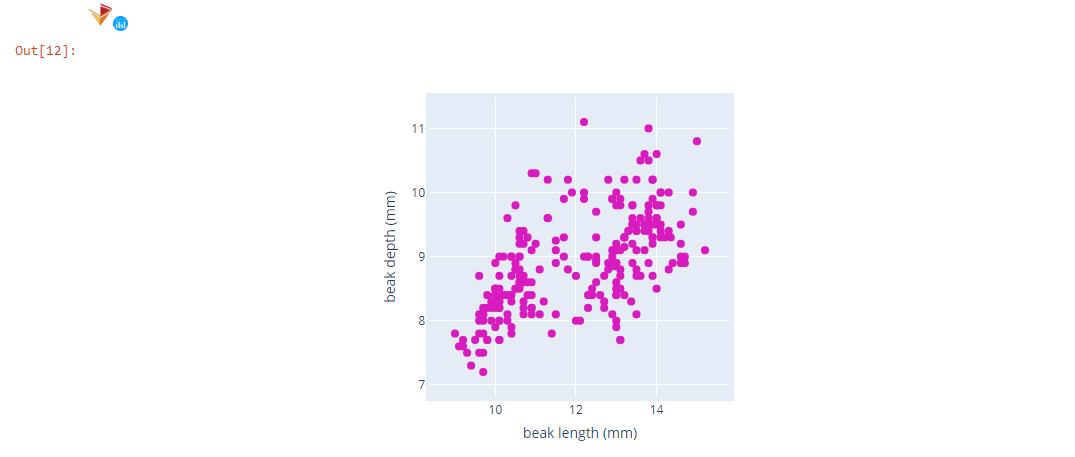

In [ ]:
hv.extension("plotly")

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'],
          vdims=['species']).opts(alpha=0.7, 
                                  color='#EF15EC', 
                                  size=8, 
                                  marker='star', 
                                  height=500, 
                                  width=500, 
                                  show_grid=True)

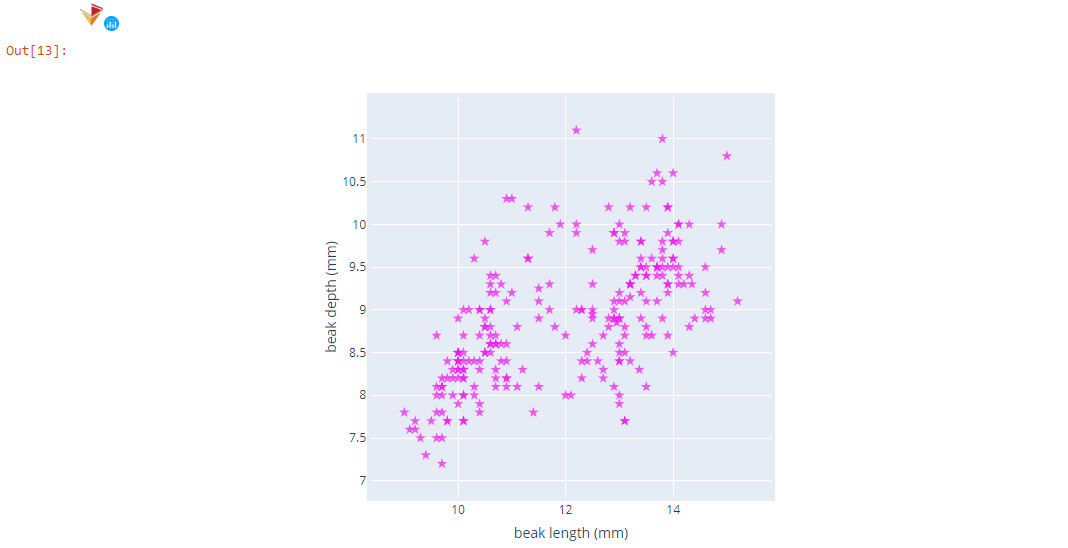

Sometimes we need to separate out the glyphs by species. To do this, we can do a groupby operation on the Element. That's right, we can do groupby operations on graphical elements!



In [ ]:
hv.extension("plotly")

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'],
          vdims=['species']).groupby('species').opts(alpha=0.7, 
                                                     color='#1BBCD8', 
                                                     size=8, 
                                                     marker='star', 
                                                     height=500, 
                                                     width=500, 
                                                     show_grid=True)

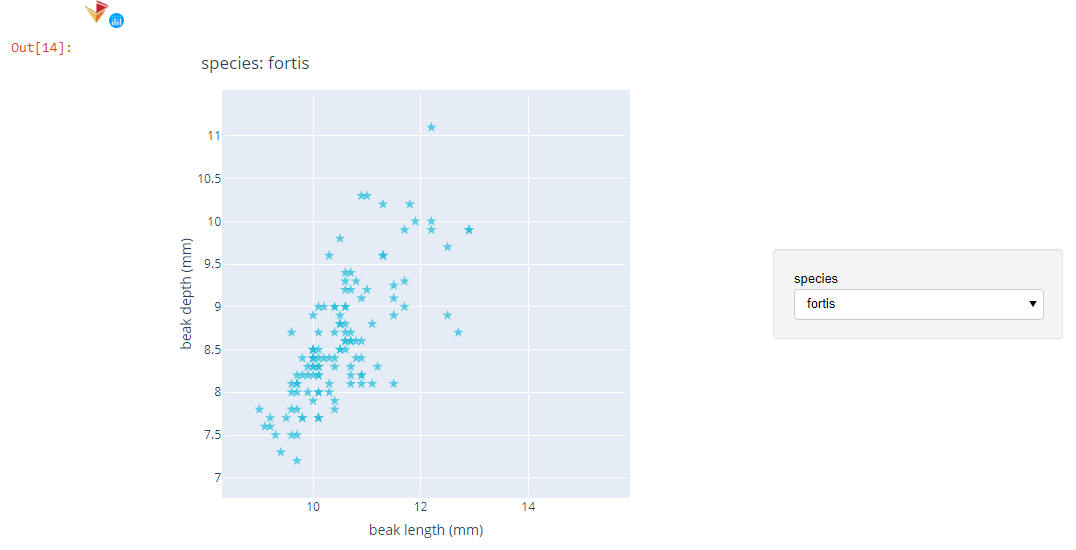

Sometimes we may be interested with grouping species and laying the plots out next to each other, creating a layout. We can use the layout() method do to this.



In [ ]:
hv.extension("plotly")

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'],
          vdims=['species']).groupby('species').opts(height=400, width=400).layout()

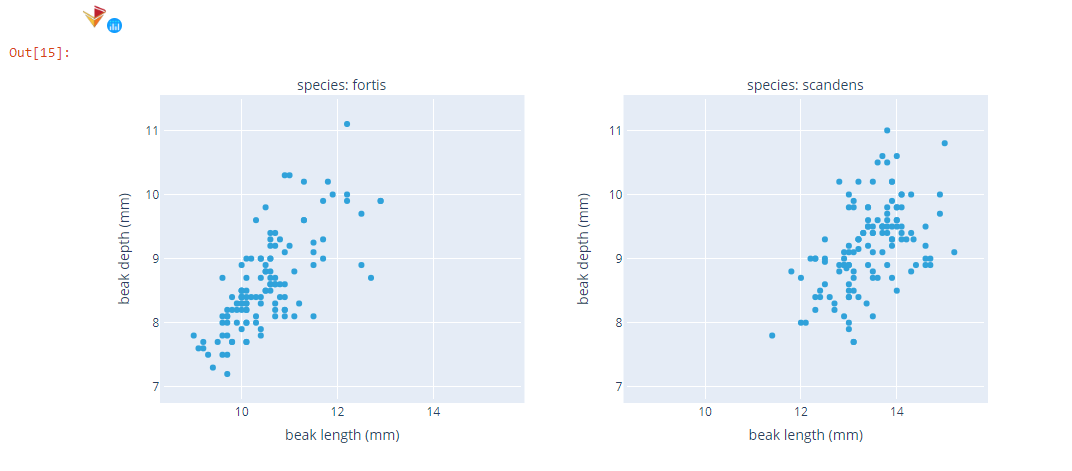

If we may wish to split each species at the same chart, we need to use overlay.



In [ ]:
hv.extension("plotly")

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'],
          vdims=['species']).groupby('species').opts(height=400, width=400).overlay()

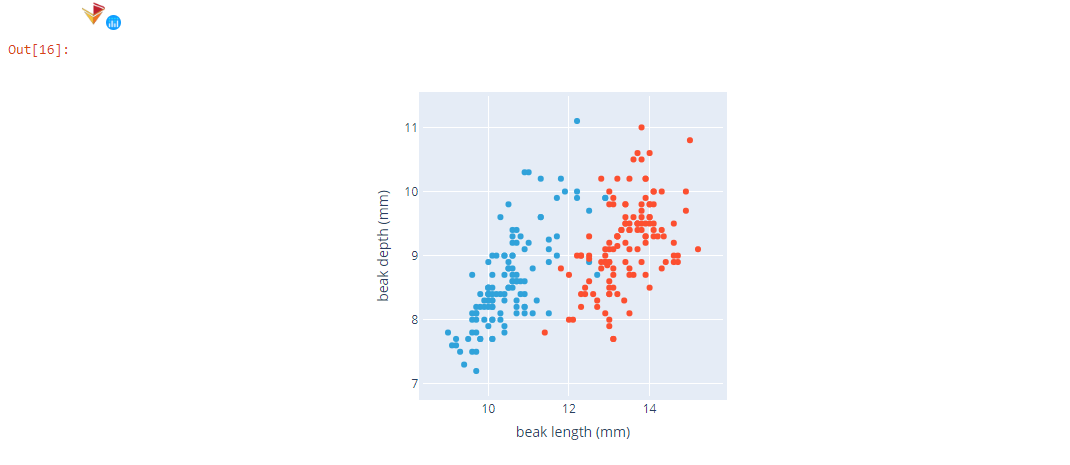

We can use .opts() to add tooltips where we can hover and get additional information from the vdims.



In [ ]:
hv.extension("bokeh")

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'],
          vdims=['species']).groupby('species').opts(tools=['hover'], 
                                                     size=6,
                                                     legend_position='top_left',
                                                     fontsize={'title': 12,'labels': 14,'xticks': 8,'yticks': 8, "legend":8},
                                                     height=400, 
                                                     width=400, 
                                                     title='Species by Beak Length & Depth').overlay()

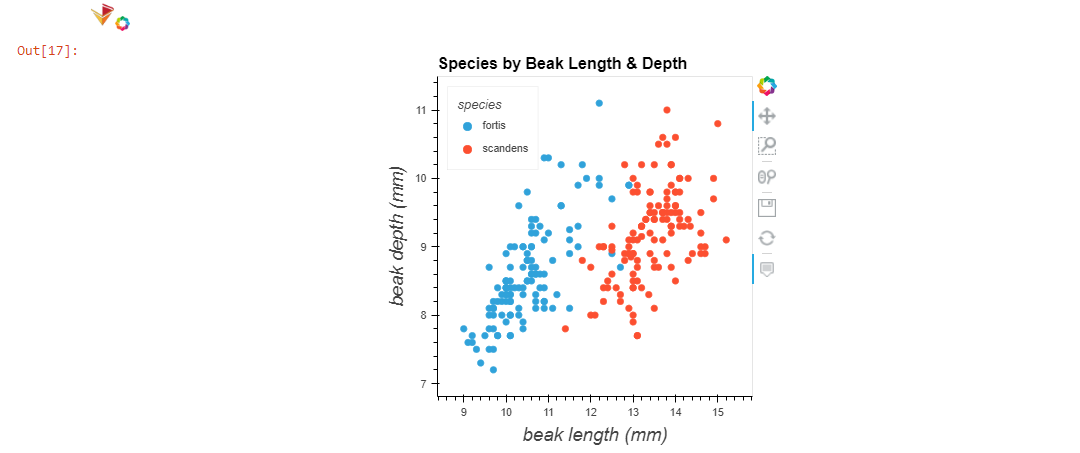

In [ ]:
hv.extension("bokeh")

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'],
          vdims=['species']).groupby('species').opts(tools=['hover'], 
                                                     size=6,
                                                     legend_position='top_left',
                                                     fontsize={'title': 12,'labels': 14,'xticks': 8,'yticks': 8, "legend":8},
                                                     height=400, 
                                                     width=400, 
                                                     title='Species by Beak Length & Depth').overlay()

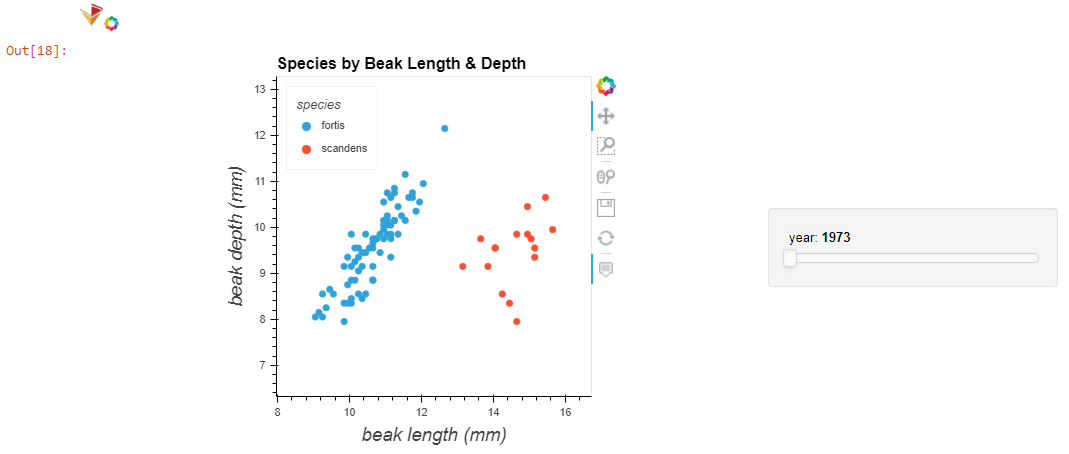

Box plots are made using hv.BoxWhisker elements. If multiple key dimensions are specified, nested categorical axes are automatically set up.



In [ ]:
hv.extension("bokeh")

hv.Points(data=df_2012,
          kdims=['beak length (mm)', 'beak depth (mm)'],
          vdims=['species']).groupby('species').opts(tools=['hover'], 
                                                     size=6,
                                                     legend_position='top_left',
                                                     fontsize={'title': 12,'labels': 14,'xticks': 8,'yticks': 8, "legend":8},
                                                     height=400, 
                                                     width=400, 
                                                     title='Species by Beak Length & Depth').overlay()

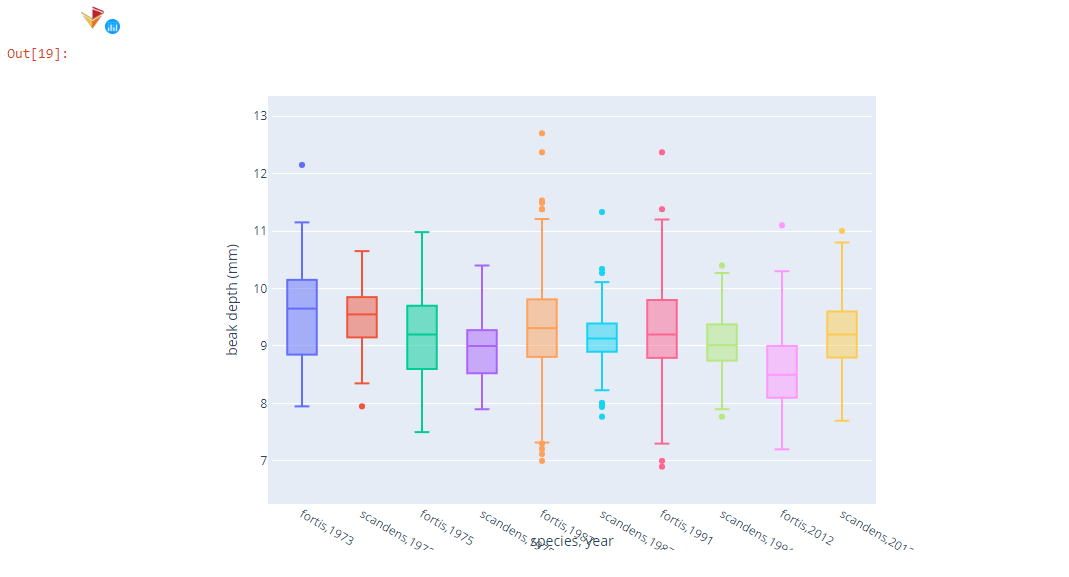

We need to use hv.Scatter() to generate strip plots. When we specify the jitter kwargs, we specify the width of the jitter.

Note that nested categorical axes are currently (as of June 10, 2021) only supported for box, violin, and bar plots, as per the docs, but will eventually be supported for many more plot types, including Scatter, which are used to generate strip plots.

In [ ]:
hv.extension("bokeh")

# Make the year column a string to be able to use as categorical

df['year_str'] = df['year'].astype(str)

hv.Scatter(data=df,
           kdims=[('year_str', 'year')],
           vdims=['beak depth (mm)', 'species']).groupby('species').opts(color='year',
                                                                         tools=['hover'], 
                                                                         jitter=0.4, 
                                                                         show_legend=False,
                                                                         width=450,
                                                                         height=350).layout()

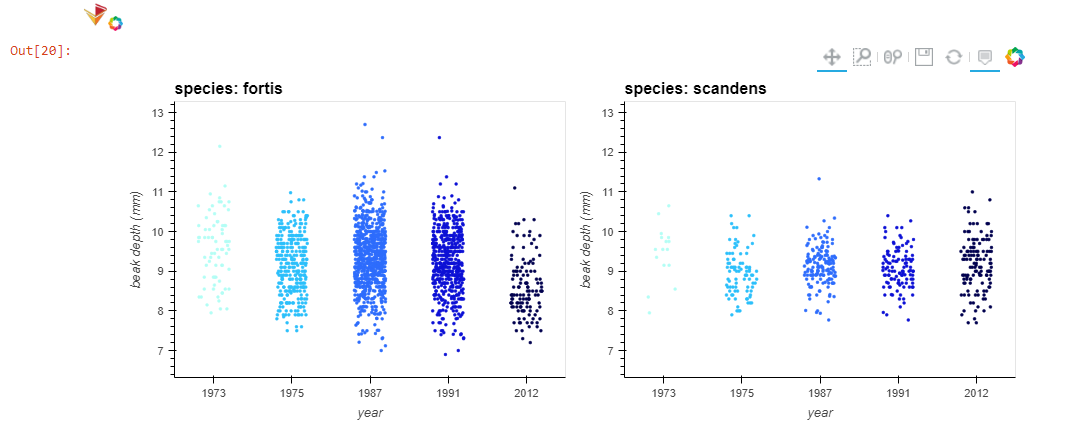

When making a histogram, the values of the bin edges and counts must be computed beforehand using np.histogram().



In [ ]:
hv.extension("bokeh")

edges, counts = np.histogram(df_2012['beak depth (mm)'], bins=int(np.sqrt(len(df_2012))))

hv.Histogram(data=(edges, counts),
             kdims='beak depth (mm)').opts(tools=['hover'], 
                                           show_legend=False,
                                           width=450,
                                           height=350)

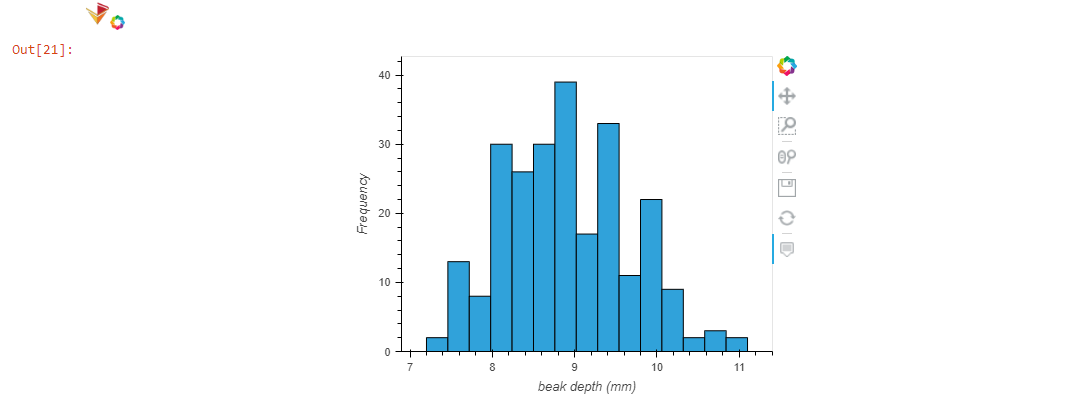

In [ ]:
import holoviews as hv
from holoviews import dim

from  bokeh.sampledata.autompg import autompg
hv.extension('bokeh')

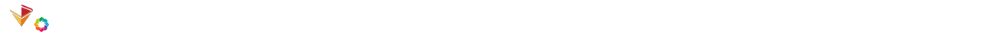

In [23]:
df.head(3)


,band,beak depth (mm),beak length (mm),species,year,year_str
0,20123,8.05,9.25,fortis,1973,1973
1,20126,10.45,11.35,fortis,1973,1973
2,20128,9.55,10.15,fortis,1973,1973


In [24]:
autompg.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [ ]:
violin = hv.Violin(df, "species", "beak depth (mm)")
violin.opts(height=400, width=800, violin_fill_color=dim('species'), cmap='Set1')

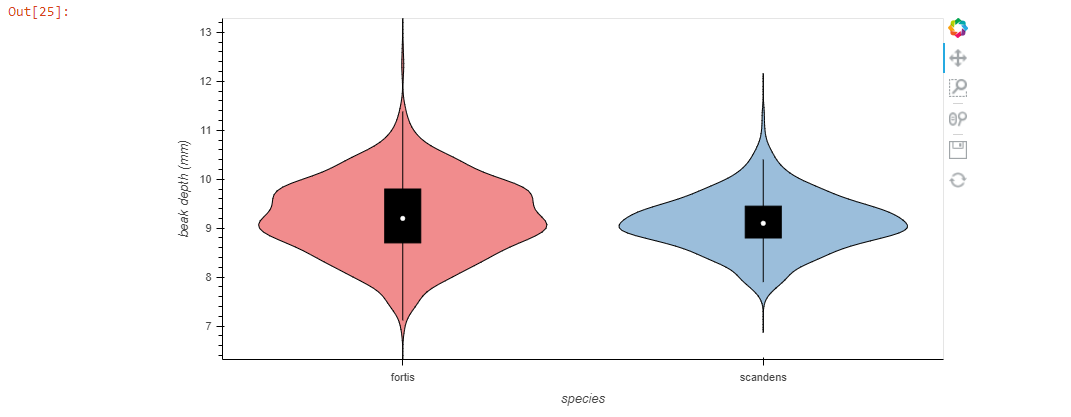

In [ ]:
violin = hv.Violin(autompg, ('yr', 'Year'), ('mpg', 'Miles per Gallon')).redim.range(mpg=(1, 50))
violin.opts(height=400, width=800, violin_fill_color=dim('Year').str(), cmap='tab10')

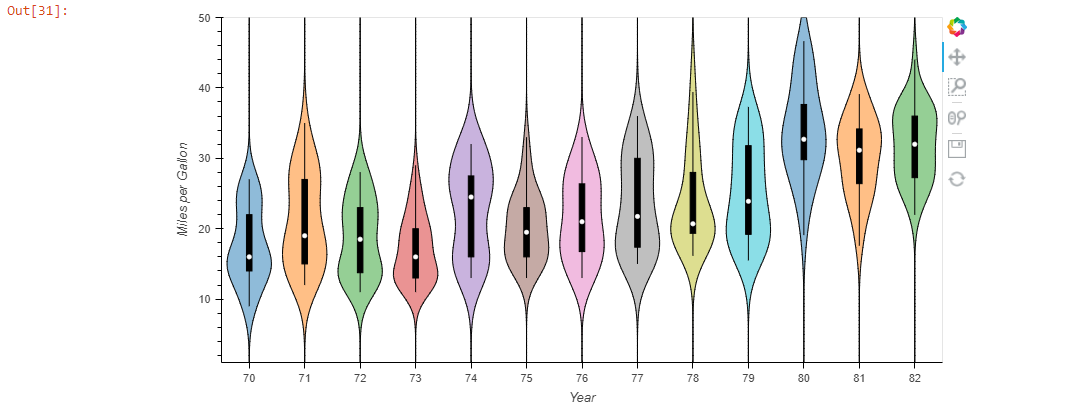

## BONUS

Empirical Cumulative Distribution Functions (ECDFs) are very important plots for visualizing how data are distributed.

In [27]:
def ecdf_transform(data):
    return data.rank(method="first") / len(data)

df_2012["beak depth ECDF"] = df_2012.groupby("species")["beak depth (mm)"].transform(ecdf_transform).values

In [ ]:
hv.Scatter(data=df_2012,
           kdims='beak depth (mm)',
           vdims=[('beak depth ECDF', 'ECDF'), 'species']).groupby('species').opts(color='species',
                                                                         tools=['hover'], 
                                                                         jitter=0.4, 
                                                                         show_legend=False,
                                                                         width=450,
                                                                         height=350).layout()

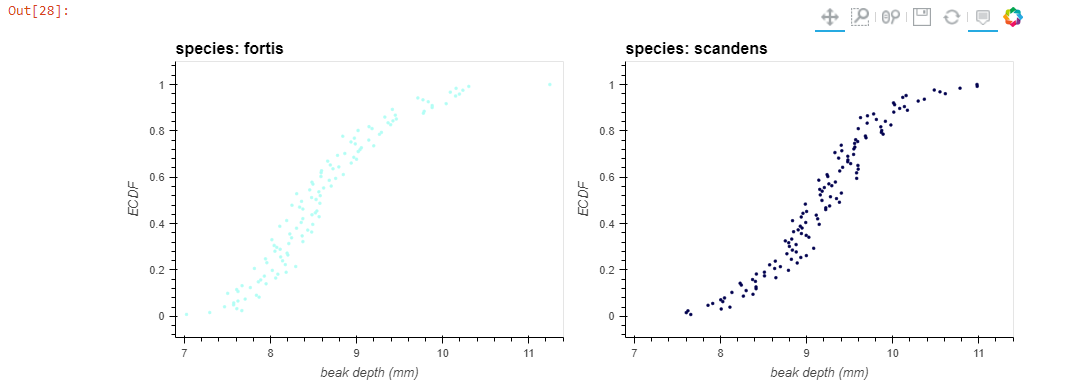

In [ ]:
hv.Scatter(data=df_2012,
           kdims='beak depth (mm)',
           vdims=[('beak depth ECDF', 'ECDF'), 'species']).groupby('species').opts(tools=['hover'], 
                                                                         jitter=0.4, 
                                                                         show_legend=False,
                                                                         width=450,
                                                                         height=350).overlay('species')

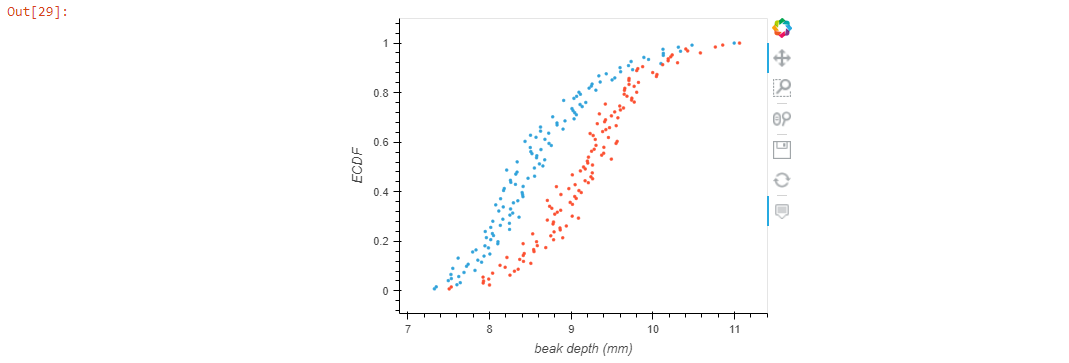